In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt


### Training Dataset
| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  

In [3]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

print(f"x_train.shape = {x_train.shape}")
print(f"y_train.shape = {y_train.shape}")


x_train.shape = (3, 4)
y_train.shape = (3,)


In [4]:
# number of training examples
m = x_train.shape[0]

# number of features
n = x_train.shape[1]

print(f"Number of training examples = {m}")
print(f"Number of features = {n}")


Number of training examples = 3
Number of features = 4


### Utility Functions

In [5]:
# Model
def f_wb(x_train, w, b):
    return np.dot(w, x_train) + b


# Cost function
def compute_cost(x_train, y_train, w, b):
    total_cost = 0
    for i in range(0, m):
        error = f_wb(x_train[i], w, b) - y_train[i]
        total_cost += error ** 2
    total_cost /= 2 * m
    return total_cost


# Gradients
def gradient(x_train, y_train, w, b):
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(0, m):
        error = f_wb(x_train[i], w, b) - y_train[i]
        for j in range(0, n):
            dj_dw[j] += error * x_train[i][j]
        dj_db += error

    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db


### Gradient Descent for Multiple Linear Regression


Final w = [ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]
b = -0.002235407530932535
cost = 686.7034116665205


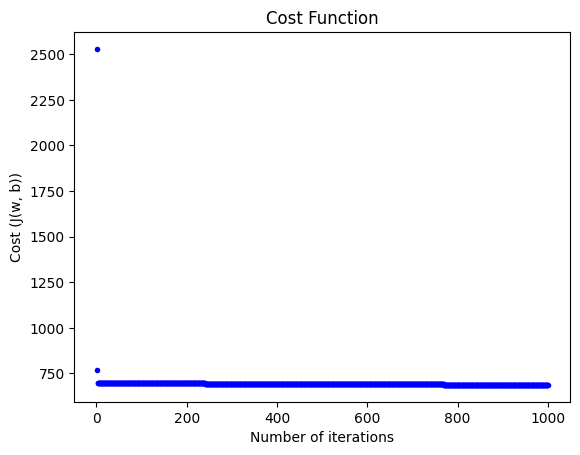

In [10]:
b = 0
w = np.zeros(n)
iterations = 1000
alpha = 5e-7

plt.title("Cost Function")
plt.xlabel("Number of iterations")
plt.ylabel("Cost (J(w, b))")
for i in range(iterations):
    dj_dw, dj_db = gradient(x_train, y_train, w, b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    cost = compute_cost(x_train, y_train, w, b)
    plt.scatter([i + 1], [cost], marker=".", c="b")
print(
    f"\nFinal w = {w}\nb = {b}\ncost = {compute_cost(x_train, y_train, w, b)}")
plt.show()